In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import normalize

In [2]:
rso_data = pd.read_csv('rso_data.txt')[['Year', 'Organization', 'Type', 'Designation', 'Standing', 'Allocation']]

## Clustering

/opt/conda/lib/python3.8/site-packages/pandas/core/indexing.py:1736: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(loc, value[:, i].tolist())


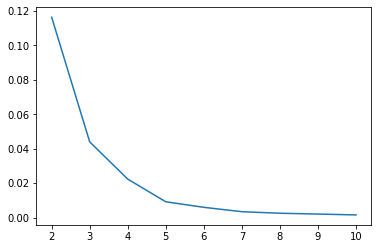

In [4]:
df_2018 = rso_data[rso_data['Year'] == 2018]
df_dummies = pd.get_dummies(df_2018, columns=['Type', 'Designation'])

X = df_dummies[['Standing', 'Allocation']]
X.loc[:] = normalize(X.loc[:])

k_vals = []
inertias = []

for i in np.arange(2, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(X)
    
    k_vals.append(i)
    inertias.append(kmeans.inertia_)
    
plt.plot(k_vals, inertias)

<ipython-input-10-847cc0ff18b8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2018['label'] = kmeans.labels_


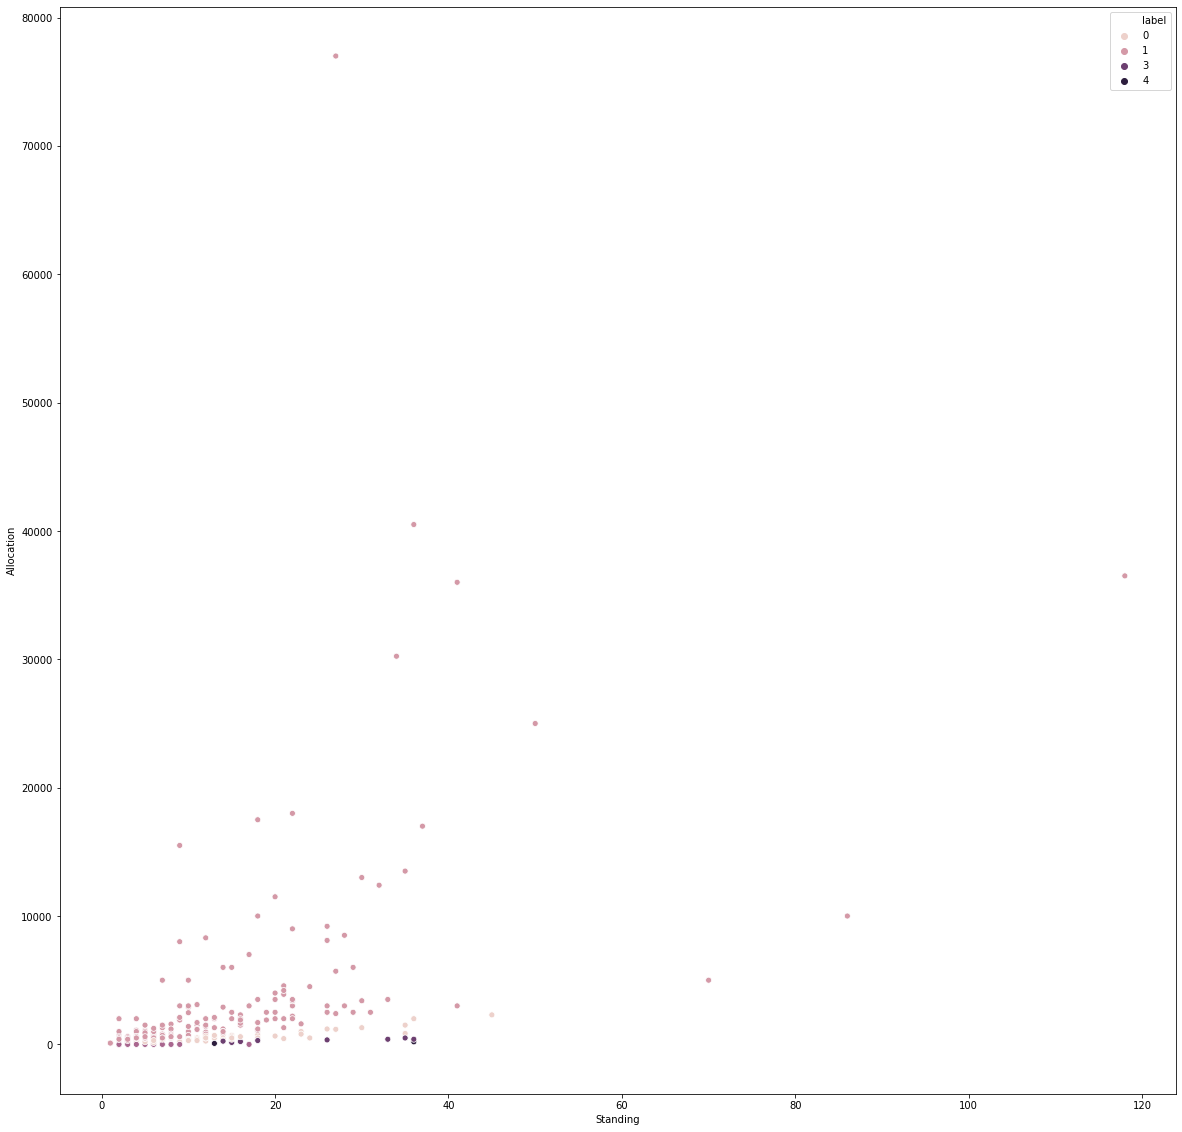

In [10]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

df_2018['label'] = kmeans.labels_

plt.figure(figsize=(20,20))
sns.scatterplot(data=df_2018, x='Standing', y='Allocation', hue='label')

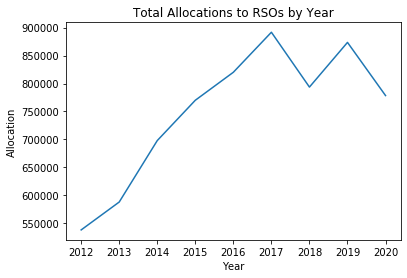

In [3]:
all_allocs = rso_data.groupby('Year').sum().reset_index()
all_rsos = rso_data.groupby('Year').count().reset_index()
holistic = pd.DataFrame([all_allocs['Year'], all_rsos['Organization'], all_allocs['Allocation']]).transpose()

holistic = holistic.astype({'Year': 'int32', 'Organization': 'int32'})

holistic['Avg per club'] = (holistic['Allocation'] / holistic['Organization']).apply(round, args=(2,))
holistic

plt.title('Total Allocations to RSOs by Year')
sns.lineplot(x='Year', y='Allocation', data=holistic)

In [4]:
bridges = ['bridges Multicultural Resource Center',
            'Indigenous and Native Coalition (INC) Recruitment and Retention Center',
            'Middle Eastern North African Recruitment and Retention Center',
            'Mixed Student Union',
            'Pilipinx Academic Student Services',
            'Raíces Recruitment and Retention Center',
            'REACH! Asian Pacific American Recruitment and Retention Center']

bridges_data = rso_data[rso_data['Organization'].isin(bridges)]
bridges_hol = bridges_data.groupby('Year').sum().reset_index()[['Year', 'Allocation']]

bridges_hol
# bridges_data[bridges_data['Year'] == 2018]
# bridges_data.sort_values(by=['Organization', 'Year'])

,Year,Allocation
0,2012,108486.25
1,2013,109563.00
2,2014,129000.00
3,2015,133000.00
4,2016,139200.00
5,2017,155866.00
6,2018,102240.00
7,2019,0.00
8,2020,0.00


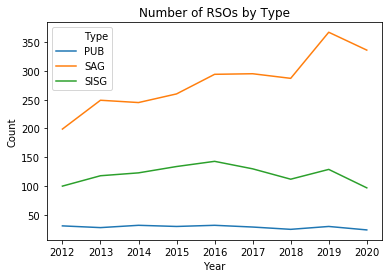

In [5]:
counts = pd.DataFrame(rso_data.groupby(['Year', 'Type']).size()).reset_index()
counts = counts.rename(columns={0: 'Count'})

plt.title('Number of RSOs by Type')
sns.lineplot(x='Year', y='Count', hue='Type', data=counts)

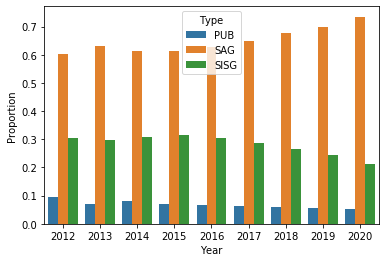

In [6]:
total = counts.groupby('Year').sum()
props = counts.copy(deep=True).rename(columns={'Count': 'Proportion'})
rso_prop = []

for year in total.index:
    idx = counts[counts['Year'] == year].index
    total_count = total.loc[year, 'Count']

    for i in idx:
        rso_prop.append(counts.at[i, 'Count'] / total_count)

props['Proportion'] = rso_prop
sns.barplot(x='Year', y='Proportion', hue='Type', data=props)

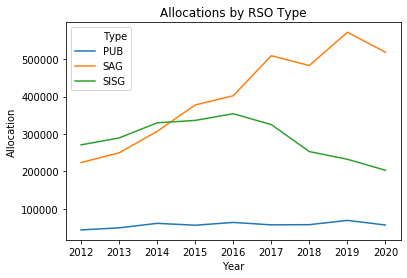

In [7]:
allocs = rso_data.groupby(['Year', 'Type']).sum().drop(columns=['Standing']).reset_index()

plt.title('Allocations by RSO Type')
sns.lineplot(x='Year', y='Allocation', hue='Type', data=allocs)

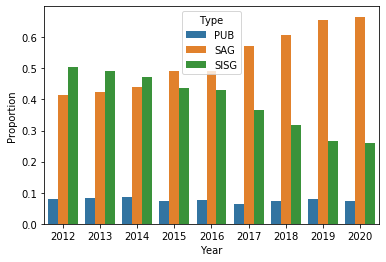

In [8]:
alloc_totals = allocs.groupby('Year').sum()
alloc_props = allocs.copy(deep=True).rename(columns={'Allocation': 'Proportion'})
alloc_prop = []

for year in alloc_totals.index:
    idx = allocs[allocs['Year'] == year].index
    total_alloc = alloc_totals.loc[year, 'Allocation']
    
    for i in idx:
        alloc_prop.append(allocs.at[i, 'Allocation'] / total_alloc)

alloc_props['Proportion'] = alloc_prop
alloc_props

sns.barplot(x='Year', y='Proportion', hue='Type', data=alloc_props)

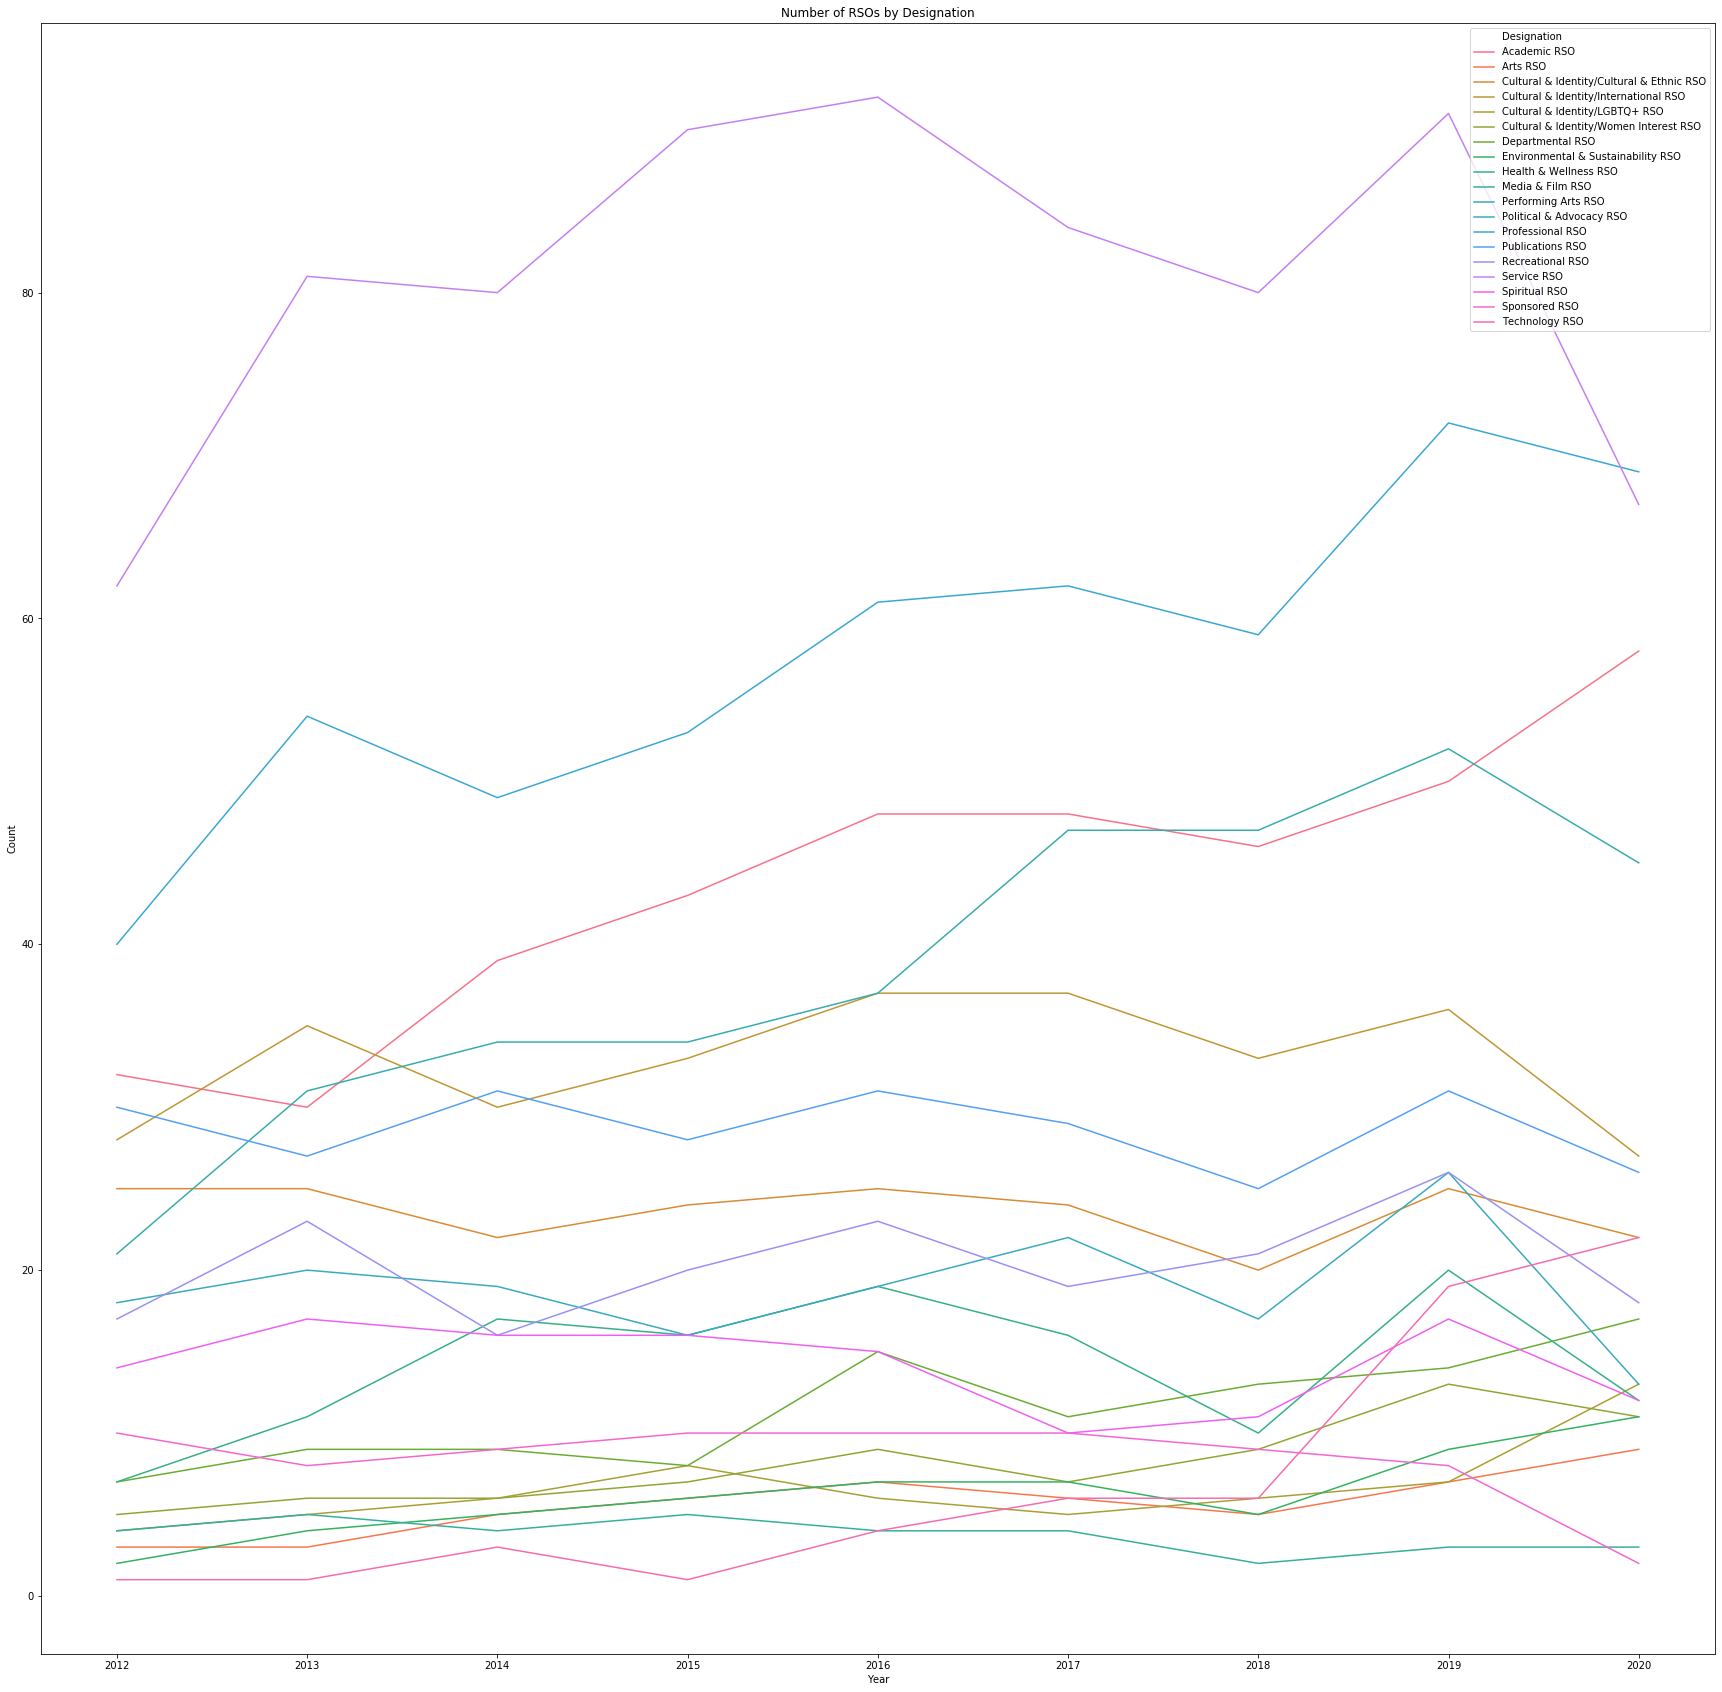

In [8]:
specific_counts = pd.DataFrame(rso_data.groupby(['Year', 'Designation']).size()).reset_index()
specific_counts = specific_counts.rename(columns={0: 'Count'})

plt.figure(figsize=(30,30))
plt.title('Number of RSOs by Designation')
sns.lineplot(x='Year', y='Count', hue='Designation', data=specific_counts)

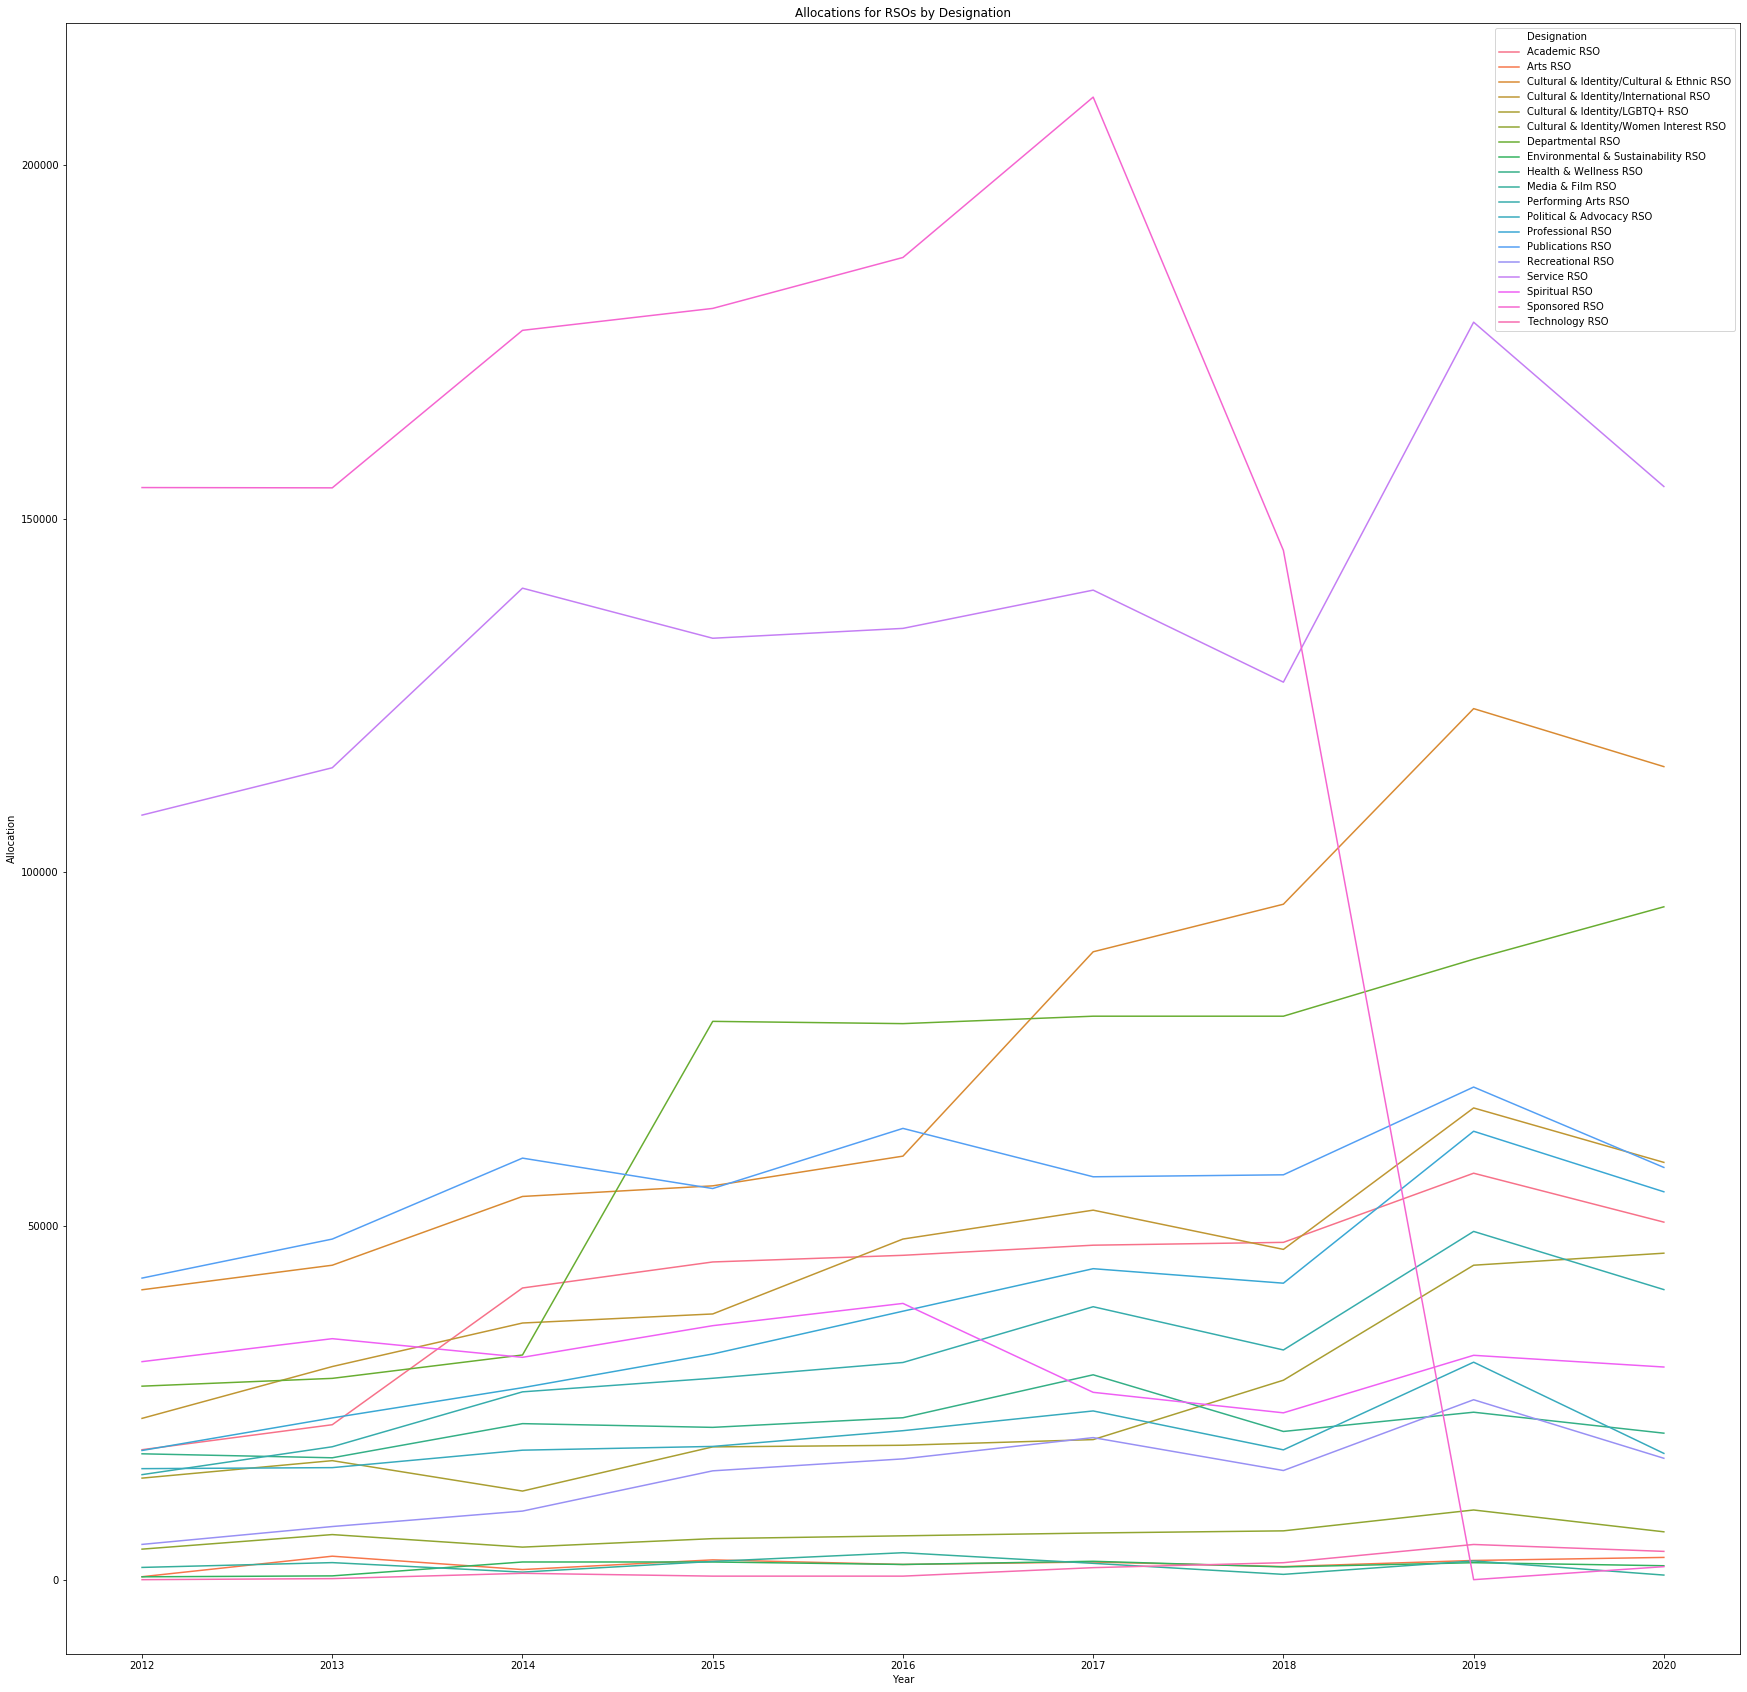

In [27]:
specific_allocs = rso_data.groupby(['Year', 'Designation']).sum().drop(columns=['Standing']).reset_index()
# specific_allocs['Allocation'] = normalize(specific_allocs['Allocation'].to_numpy().reshape(-1,1))
plt.figure(figsize=(30,30))
plt.title('Allocations for RSOs by Designation')
plot = sns.lineplot(x='Year', y='Allocation', hue='Designation', data=specific_allocs)
# save = plot.get_figure(
# save.savefig('output.png')

In [27]:
rso_18 = rso_data[rso_data['Year'] == 2018]
allocs_18 = rso_18.groupby('Designation').sum()[['Allocation']]
clubs_18 = rso_18.groupby('Designation').count()[['Organization']]
allocs_18['Allocation'] / clubs_18['Organization']
# rso_18[rso_18['Designation'].str.contains('Ethnic')]

Designation
Academic RSO                                  1036.543478
Arts RSO                                       370.000000
Cultural & Identity/Cultural & Ethnic RSO     4774.000000
Cultural & Identity/International RSO         1414.787879
Cultural & Identity/LGBTQ+ RSO                4699.166667
Cultural & Identity/Women Interest RSO         766.666667
Departmental RSO                              6126.923077
Environmental & Sustainability RSO             360.000000
Health & Wellness RSO                         2095.000000
Media & Film RSO                               375.000000
Performing Arts RSO                            690.851064
Political & Advocacy RSO                      1079.411765
Professional RSO                               710.338983
Publications RSO                              2289.200000
Recreational RSO                               734.761905
Service RSO                                   1585.862500
Spiritual RSO                                 2143.909091
Sp

In [33]:
# rso_data.to_csv('rso_data.txt')

In [8]:
rso_data.loc[rso_data[rso_data['Year']==2019].groupby('Designation').Allocation.agg('idxmax')]

,Year,Organization,Type,Designation,Standing,Allocation
3021,2019,California Mock Trial,SAG,Academic RSO,19,20000.0
3078,2019,Fashion and Student Trends,SAG,Arts RSO,8,1000.0
3010,2019,Black Student Union,SAG,Cultural & Identity/Cultural & Ethnic RSO,10,25500.0
3105,2019,Indian Students Association,SAG,Cultural & Identity/International RSO,16,10000.0
3383,2019,Queer Alliance & Resource Center,SISG,Cultural & Identity/LGBTQ+ RSO,51,40000.0
3409,2019,TRENZA,SISG,Cultural & Identity/Women Interest RSO,8,2500.0
3070,2019,Engineering Student Council,SAG,Departmental RSO,28,84330.0
3074,2019,Epsilon Eta,SAG,Environmental & Sustainability RSO,3,500.0
3348,2019,Health and Medical Apprenticeship Program,SISG,Health & Wellness RSO,36,10700.0
3341,2019,GiANT Filmmakers,SISG,Media & Film RSO,11,1900.0


In [11]:
rso_data[(rso_data['Year']==2019) &
         (rso_data['Designation']=='Political & Advocacy RSO')].sort_values('Allocation', ascending=False)

,Year,Organization,Type,Designation,Standing,Allocation
3038,2019,"BAMN - Coalition to Defend Affirmative Action,...",SAG,Political & Advocacy RSO,21,5000.0
2975,2019,Berkeley College Republicans,SAG,Political & Advocacy RSO,24,5000.0
3008,2019,Cal Berkeley Democrats,SAG,Political & Advocacy RSO,22,4400.0
3242,2019,Students for Life at Berkeley,SAG,Political & Advocacy RSO,21,3250.0
3139,2019,Liberty in North Korea at Berkeley,SAG,Political & Advocacy RSO,15,1500.0
3241,2019,Students for Justice in Palestine,SAG,Political & Advocacy RSO,13,1500.0
3196,2019,Progressive Student Association,SAG,Political & Advocacy RSO,6,1410.0
3389,2019,Southeast Asian Prison Outreach Project,SISG,Political & Advocacy RSO,9,850.0
2916,2019,Policy Review at Berkeley,PUB,Political & Advocacy RSO,1,700.0
3391,2019,Spectrum: Autism at Cal,SISG,Political & Advocacy RSO,9,600.0


In [17]:
rso_data[rso_data['Year']==2017].sort_values('Allocation', ascending=False)

# Cultural RSOs are awarded the most $$, it seems
rso_data[rso_data['Organization']=='Korean American Student Association']

,Year,Organization,Type,Designation,Standing,Allocation
149,2012,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,31,4551.44
507,2013,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,32,4642.00
895,2014,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,33,4500.00
1288,2015,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,34,4300.00
1739,2016,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,35,4700.00
2200,2017,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,36,19300.00
2653,2018,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,37,17000.00
3127,2019,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,38,17000.00
3638,2020,Korean American Student Association,SAG,Cultural & Identity/Cultural & Ethnic RSO,39,12000.00
